<a href="https://colab.research.google.com/github/fairuznawar122/World-Happiness-Classification/blob/main/World-Happiness-Classification%3A%20Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# import os
# import shutil

# # Define paths
# drive_path = "/content/drive/My Drive/kaggle.json"
# kaggle_path = "/root/.kaggle/kaggle.json"

# # Create .kaggle directory if it doesn't exist
# os.makedirs("/root/.kaggle", exist_ok=True)

# # Copy the kaggle.json file
# shutil.copy(drive_path, kaggle_path)

# # Set the correct permissions
# os.chmod(kaggle_path, 600)
import os
os.environ['KAGGLE_USERNAME'] = "fariuznawar"
os.environ['KAGGLE_KEY'] = "6c2d1b94eb81cb2616870c4ea4764fda"

!kaggle datasets download -d mathurinache/world-happiness-report

Dataset URL: https://www.kaggle.com/datasets/mathurinache/world-happiness-report
License(s): CC0-1.0
world-happiness-report.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
import zipfile
with zipfile.ZipFile("world-happiness-report.zip", "r") as zip_ref:
    zip_ref.extractall("world-happiness-report")


### Accessing the Data files





In [56]:
year = input("Enter the Year: ")
filename = "world-happiness-report/" + year + ".csv"

Enter the Year: 2022


In [57]:
import pandas as pd
df = pd.read_csv(filename)
df = df.dropna()
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


### Data Processing


In [58]:
if(year=="2015"):
  df.drop("Region", axis=1, inplace=True)
  df.drop("Happiness Rank", axis=1, inplace=True)
  df.drop("Dystopia Residual", axis=1, inplace=True)
  df.drop("Standard Error", axis=1, inplace=True)
  df = df.rename(columns={'Economy (GDP per Capita)': 'Economy'})
  df = df.rename(columns={'Trust (Government Corruption)': 'Trust'})
  df = df.rename(columns={'Health (Life Expectancy)': 'Health'})

if(year=="2018"):
  df.drop("Overall rank", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Score': 'Happiness Score'})
  df = df.rename(columns={'Country or region': 'Country'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'GDP per capita': 'Economy'})

if(year=="2020"):
  df.drop("Regional indicator", axis=1, inplace=True)
  df.drop("Standard error of ladder score", axis=1, inplace=True)
  df.drop("upperwhisker", axis=1, inplace=True)
  df.drop("lowerwhisker", axis=1, inplace=True)
  df.drop("Ladder score in Dystopia", axis=1, inplace=True)
  df.drop("Dystopia + residual", axis=1, inplace=True)
  df.drop("Explained by: Log GDP per capita", axis=1, inplace=True)
  df.drop("Explained by: Social support", axis=1, inplace=True)
  df.drop("Explained by: Healthy life expectancy", axis=1, inplace=True)
  df.drop("Explained by: Freedom to make life choices", axis=1, inplace=True)
  df.drop("Explained by: Generosity", axis=1, inplace=True)
  df.drop("Explained by: Perceptions of corruption", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Country name': 'Country'})
  df = df.rename(columns={'Ladder score': 'Happiness Score'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'Logged GDP per capita': 'Economy'})

if(year=="2022"):
  df.drop("RANK", axis=1, inplace=True)
  df.drop("Whisker-high", axis=1, inplace=True)
  df.drop("Whisker-low", axis=1, inplace=True)
  df.drop("Dystopia (1.83) + residual", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Explained by: GDP per capita': 'Economy'})
  df = df.rename(columns={'Explained by: Social support': 'Social Support'})
  df = df.rename(columns={'Explained by: Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Explained by: Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Explained by: Generosity': 'Generosity'})
  df = df.rename(columns={'Explained by: Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Happiness score': 'Happiness Score'})

  # To fix the numerical values in the data
  for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.replace(',', '.')

  # Convert all columns to numeric (excluding non-numeric columns like country names)
  for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        # Handle the case if a column can't be converted (keep it as is)
        pass
  df = df[:-1]

df

,Country,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...
140,Lesotho*,3.512,0.839,0.848,0.000,0.419,0.076,0.018
141,Botswana*,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,Rwanda*,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105


In [59]:
possible_column_names = ['Country', 'Country or region', 'Country name']

In [60]:
# Function to check, extract and delete the column
def extract_and_delete_column(df, possible_column_names):
    for name in possible_column_names:
        if name in df.columns:
            extracted_column = df[name]  # Extract column
            df.drop(name, axis=1, inplace=True)  # Delete the column from df
            print(f"✅ Column '{name}' extracted and deleted from df.")
            return extracted_column
    print(f"⚠️ Column not found from: {possible_column_names}")
    return None

final_df = extract_and_delete_column(df, possible_column_names)
final_df = pd.DataFrame(final_df)

split_size = len(final_df) // 3
categories = ['Strong Happy'] * split_size + ['Moderate Happy'] * split_size + ['Weak Happy'] * (len(final_df) - 2 * split_size)
final_df['Category'] = categories

final_df


✅ Column 'Country' extracted and deleted from df.


,Country,Category
0,Finland,Strong Happy
1,Denmark,Strong Happy
2,Iceland,Strong Happy
3,Switzerland,Strong Happy
4,Netherlands,Strong Happy
...,...,...
140,Lesotho*,Weak Happy
141,Botswana*,Weak Happy
142,Rwanda*,Weak Happy
143,Zimbabwe,Weak Happy


In [61]:
df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust
0,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...
140,3.512,0.839,0.848,0.000,0.419,0.076,0.018
141,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,2.995,0.947,0.690,0.270,0.329,0.106,0.105


In [32]:
print(df.isnull().sum())

Happiness Score    0
Economy            0
Social Support     0
Health             0
Freedom            0
Generosity         0
Trust              0
dtype: int64


### Conditional Dependencies

In [62]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Example DataFrame
# df = pd.DataFrame({...})  # Your data here

# Initialize a matrix to store results
n_features = df.shape[1]
cond_mi_matrix = np.zeros((n_features, n_features))

# Calculate conditional mutual information for all pairs
for i in range(n_features):
    for j in range(n_features):
        if i != j:
            # Feature X and Y
            X = df.iloc[:, [i]]  # Feature X (1D array)
            Y = df.iloc[:, [j]]  # Feature Y (1D array)

            # Condition on all other features except i and j
            condition_features = df.drop(columns=[df.columns[i], df.columns[j]])

            # Flatten Y to 1D array
            Y = Y.values.flatten()

            # Calculate conditional mutual information
            cond_mi = mutual_info_regression(X=condition_features, y=Y)
            cond_mi_matrix[i, j] = cond_mi.mean()  # Average over conditions

# Convert to DataFrame for better readability
cond_mi_df = pd.DataFrame(cond_mi_matrix, index=df.columns, columns=df.columns)
print("Conditional Dependency Matrix:")
cond_mi_df

Conditional Dependency Matrix:


,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust
Happiness Score,0.000000,0.317277,0.205278,0.278778,0.144499,0.055621,0.133142
Economy,0.274055,0.000000,0.241118,0.233776,0.151941,0.035023,0.112824
Social Support,0.272240,0.351010,0.000000,0.302680,0.154998,0.043654,0.145005
Health,0.290085,0.288867,0.245326,0.000000,0.156611,0.047835,0.127166
Freedom,0.331022,0.383010,0.271957,0.330692,0.000000,0.061234,0.128637
Generosity,0.373145,0.398768,0.291190,0.352659,0.192390,0.000000,0.160703
Trust,0.347707,0.375187,0.293177,0.333730,0.158927,0.062486,0.000000


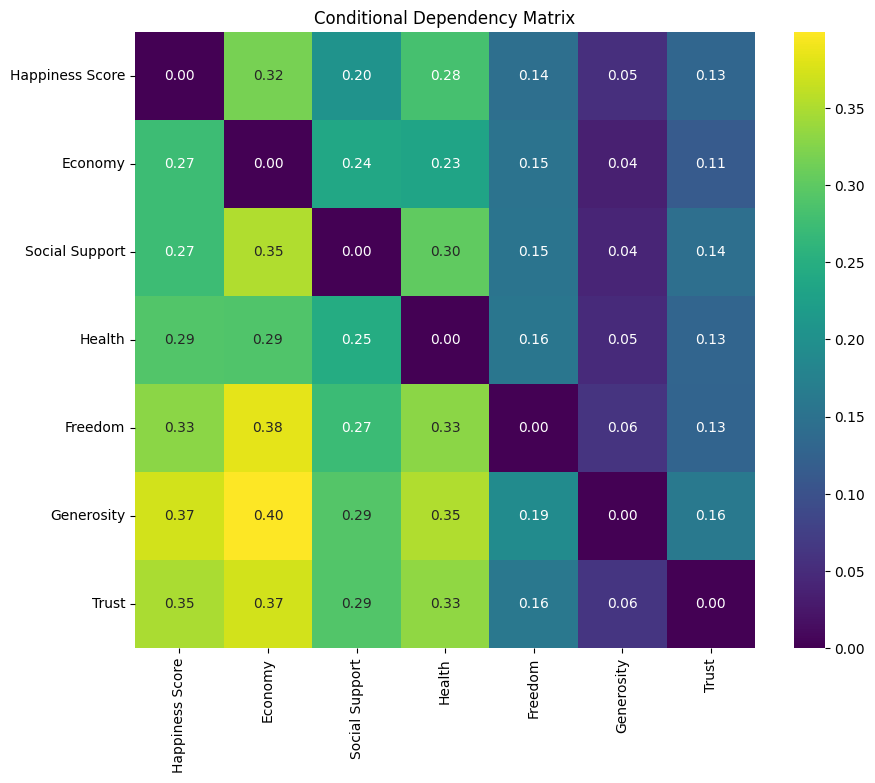

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for Conditional Dependency
plt.figure(figsize=(10, 8))
sns.heatmap(cond_mi_df, annot=True, cmap='viridis', fmt=".2f")
plt.title("Conditional Dependency Matrix")
plt.show()

Add Labels

In [63]:
final_df.drop(final_df.columns[0], axis=1, inplace=True)
df= pd.concat([df, final_df], axis=1)
df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Category
0,7.821,1.892,1.258,0.775,0.736,0.109,0.534,Strong Happy
1,7.636,1.953,1.243,0.777,0.719,0.188,0.532,Strong Happy
2,7.557,1.936,1.320,0.803,0.718,0.270,0.191,Strong Happy
3,7.512,2.026,1.226,0.822,0.677,0.147,0.461,Strong Happy
4,7.415,1.945,1.206,0.787,0.651,0.271,0.419,Strong Happy
...,...,...,...,...,...,...,...,...
140,3.512,0.839,0.848,0.000,0.419,0.076,0.018,Weak Happy
141,3.471,1.503,0.815,0.280,0.571,0.012,0.102,Weak Happy
142,3.268,0.785,0.133,0.462,0.621,0.187,0.544,Weak Happy
143,2.995,0.947,0.690,0.270,0.329,0.106,0.105,Weak Happy


### Categorizing the features : Using Decision Tree



In [64]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

X = df[['Health', 'Freedom','Trust', 'Generosity']]  # Features that influence Economy
y = df['Economy']  # Economy is the target

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y)
# Extract unique thresholds from Decision Tree
thresholds = np.sort(tree_reg.tree_.threshold[tree_reg.tree_.threshold > 0])  # Remove unused splits

# **Pick only two meaningful thresholds** (1/3 and 2/3 positions)
if len(thresholds) >= 2:
    thresholds = [thresholds[len(thresholds) // 3], thresholds[2 * len(thresholds) // 3]]
else:
    print("Not enough splits from Decision Tree, using quantiles instead.")
    thresholds = list(df['Economy'].quantile([1/3, 2/3]))  # Fallback to quantiles

# Define bin edges and labels
bin_edges = [-np.inf] + list(thresholds) + [np.inf]
bin_labels = ['Low', 'Moderate', 'High']

# Categorize Economy into bins
df['Economy'] = pd.cut(df['Economy'], bins=bin_edges, labels=bin_labels)
df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Category
0,7.821,High,1.258,0.775,0.736,0.109,0.534,Strong Happy
1,7.636,High,1.243,0.777,0.719,0.188,0.532,Strong Happy
2,7.557,High,1.320,0.803,0.718,0.270,0.191,Strong Happy
3,7.512,High,1.226,0.822,0.677,0.147,0.461,Strong Happy
4,7.415,High,1.206,0.787,0.651,0.271,0.419,Strong Happy
...,...,...,...,...,...,...,...,...
140,3.512,High,0.848,0.000,0.419,0.076,0.018,Weak Happy
141,3.471,High,0.815,0.280,0.571,0.012,0.102,Weak Happy
142,3.268,High,0.133,0.462,0.621,0.187,0.544,Weak Happy
143,2.995,High,0.690,0.270,0.329,0.106,0.105,Weak Happy


### Categorizing the other features : Custom Bin ranges




In [65]:
# Number of bins/Categories you want
n_bins = 3
category_labels = ['Low', 'Medium', 'High']
# Create equal-width bins for each column
for column in df.columns:
    if column=="Economy" or column=="Category":
      continue
    min_val = df[column].min()- 1e-3  # Minimum value
    max_val = df[column].max()  # Maximum value
    bins = [min_val, min_val + (max_val - min_val) / 3, min_val + 2 * (max_val - min_val) / 3, max_val]
    df[column] = pd.cut(df[column], bins=bins, labels=category_labels)

df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Category
0,High,High,High,High,High,Low,High,Strong Happy
1,High,High,High,High,High,Medium,High,Strong Happy
2,High,High,High,High,High,Medium,Low,Strong Happy
3,High,High,High,High,High,Low,High,Strong Happy
4,High,High,High,High,High,Medium,High,Strong Happy
...,...,...,...,...,...,...,...,...
140,Low,High,Medium,Low,Medium,Low,Low,Weak Happy
141,Low,High,Medium,Low,High,Low,Low,Weak Happy
142,Low,High,Low,Medium,High,Medium,High,Weak Happy
143,Low,High,Medium,Low,Medium,Low,Low,Weak Happy


### User Input Columns

In [66]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

df.drop("Category", axis=1, inplace=True)

selected_df = pd.DataFrame()
# Create multi-select widget for column selection
column_selector = widgets.SelectMultiple(
    options=df.columns,
    value=[df.columns[0]],  # Default selection
    description='Select Columns:',
    style={'description_width': 'initial'},  # Adjust description width
    layout=widgets.Layout(
        width='70%',  # Set width
        height='auto',  # Set height
        border='2px solid black',  # Border style
        padding='10px',  # Padding inside box
        margin='20px auto',  # Margin around box
    )
)

# Output widget to display the selected columns
output = widgets.Output()

def show_selected_columns(change):
    with output:
        output.clear_output()  # Clear previous output
        selected_columns = list(column_selector.value)  # Get selected columns

        if selected_columns:
            print()
            display(df[selected_columns].head())  # Show first 5 rows
        else:
            print("⚠️ No columns selected!")

# Attach the function to update on selection
column_selector.observe(show_selected_columns, names='value')

# Button to save the selected columns

def save_selected_columns(b):
    selected_columns = list(column_selector.value)

    if not selected_columns:
        print("⚠️ Please select at least one column!")
        return
    global selected_df
    # selected_df = pd.concat([df[selected_columns],selected_df], axis=1)
    selected_df = df[selected_columns]
    # print()
    # print()
    # print(selected_df.head())
    print("✅ Saved selected columns to \"selected_df\" dataframe!")




save_button = widgets.Button(
    description="💾 Save Selected Columns",
    button_style="info",  # 'success' = Green, 'info' = Blue, 'warning' = Orange, 'danger' = Red
    tooltip="Click to save selected columns",
    icon="check",  # Adds a checkmark icon
    layout=widgets.Layout(width='250px', height='40px'),  # Adjust button size
    margin='20px auto',  # Margin around box
)
print()
# save_button = widgets.Button(description="Confirm Selection")
save_button.on_click(save_selected_columns)
print()
print()
# Display everything
display(column_selector, output, save_button)


SelectMultiple(description='Select Columns:', index=(0,), layout=Layout(border='2px solid black', height='auto…

Output()

Button(button_style='info', description='💾 Save Selected Columns', icon='check', layout=Layout(height='40px', …

✅ Saved selected columns to "selected_df" dataframe!


In [67]:
selected_df

,Health,Freedom,Generosity,Trust
0,High,High,Low,High
1,High,High,Medium,High
2,High,High,Medium,Low
3,High,High,Low,High
4,High,High,Medium,High
...,...,...,...,...
140,Low,Medium,Low,Low
141,Low,High,Low,Low
142,Medium,High,Medium,High
143,Low,Medium,Low,Low


In [68]:
df=selected_df
df= pd.concat([df, final_df], axis=1)
df

,Health,Freedom,Generosity,Trust,Category
0,High,High,Low,High,Strong Happy
1,High,High,Medium,High,Strong Happy
2,High,High,Medium,Low,Strong Happy
3,High,High,Low,High,Strong Happy
4,High,High,Medium,High,Strong Happy
...,...,...,...,...,...
140,Low,Medium,Low,Low,Weak Happy
141,Low,High,Low,Low,Weak Happy
142,Medium,High,Medium,High,Weak Happy
143,Low,Medium,Low,Low,Weak Happy


### Naive Bayes Classifier

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = MultinomialNB()

label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Category'])  # Features
y = df['Category']  # Labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy *100:.2f}%")


Accuracy: 62.07%


### Finding the Correct and Incorrect Classifications

In [18]:

feature_mapping = {0: 'Low', 1: 'Moderate', 2: 'High'}  # Map numerical values to strings
class_mapping = {0: 'Weak Happy', 1: 'Moderate Happy', 2: 'Strong Happy'}

df_results = pd.DataFrame(X_test.reset_index(drop=True), columns=X.columns)  # Convert X_test to DataFrame with feature names
for column in df_results.columns:
    df_results[column] = df_results[column].map(feature_mapping)  # Map numerical values to strings
df_results.shape


# Convert y_test and y_pred to pandas Series
y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

# Map the numerical labels to class names
y_test_series = y_test_series.map(class_mapping).reset_index(drop=True)
y_pred_series = y_pred_series.map(class_mapping).reset_index(drop=True)

# Combine into a DataFrame for easy comparison
df_results['Actual'] = y_test_series  # Add actual labels (y_test) to the DataFrame
df_results['Predicted'] = y_pred_series
df_results

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Actual,Predicted
0,High,Low,Low,High,Low,High,Moderate,Weak Happy,Weak Happy
1,Moderate,Low,High,Moderate,High,Moderate,Moderate,Strong Happy,Strong Happy
2,Low,Low,Low,Low,Low,Moderate,Moderate,Moderate Happy,Moderate Happy
3,Low,Low,Low,Low,Low,Moderate,High,Moderate Happy,Moderate Happy
4,High,Low,Low,Low,Low,High,Moderate,Moderate Happy,Weak Happy
5,Moderate,Low,High,Moderate,High,High,Moderate,Strong Happy,Strong Happy
6,Moderate,Low,Low,Low,Low,Moderate,Moderate,Strong Happy,Weak Happy
7,High,Low,High,Moderate,High,High,Moderate,Strong Happy,Strong Happy
8,High,Low,Low,Low,Low,Moderate,Moderate,Weak Happy,Weak Happy
9,Low,Low,Low,Low,High,Moderate,High,Moderate Happy,Moderate Happy


In [19]:
# Filter out correct and incorrect classifications
correct_classifications = df_results[df_results['Actual'] == df_results['Predicted']]
incorrect_classifications = df_results[df_results['Actual'] != df_results['Predicted']]

# Display the results
print("Correct Classifications:")
print(correct_classifications)
print(correct_classifications.shape)
print("\nIncorrect Classifications:")
print(incorrect_classifications)
print(incorrect_classifications.shape)

Correct Classifications:
   Happiness Score Economy Social Support    Health Freedom Generosity  \
0             High     Low            Low      High     Low       High   
1         Moderate     Low           High  Moderate    High   Moderate   
2              Low     Low            Low       Low     Low   Moderate   
3              Low     Low            Low       Low     Low   Moderate   
5         Moderate     Low           High  Moderate    High       High   
7             High     Low           High  Moderate    High       High   
8             High     Low            Low       Low     Low   Moderate   
9              Low     Low            Low       Low    High   Moderate   
10             Low     Low            Low       Low     Low       High   
11            High     Low            Low       Low     Low   Moderate   
12        Moderate     Low           High      High    High   Moderate   
13            High     Low           High       Low    High   Moderate   
14           

In [20]:
incorrect_classifications

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Actual,Predicted
4,High,Low,Low,Low,Low,High,Moderate,Moderate Happy,Weak Happy
6,Moderate,Low,Low,Low,Low,Moderate,Moderate,Strong Happy,Weak Happy
20,High,Low,High,High,Low,High,Moderate,Weak Happy,Strong Happy
25,High,Low,High,High,Low,Moderate,Moderate,Moderate Happy,Weak Happy
28,High,Low,High,Low,Moderate,Moderate,Moderate,Strong Happy,Weak Happy
41,High,Low,Low,High,High,High,Moderate,Strong Happy,Weak Happy
42,High,Low,Moderate,High,High,Moderate,High,Strong Happy,Weak Happy


In [20]:
correct_classifications

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Actual,Predicted
1,High,Low,Low,Low,Low,High,Low,Weak Happy,Weak Happy
5,High,Low,High,Moderate,High,High,Low,Strong Happy,Strong Happy
6,High,Low,Low,Low,High,Moderate,Low,Weak Happy,Weak Happy
7,High,Low,Low,Low,Low,High,Low,Weak Happy,Weak Happy
8,Low,Low,Low,Low,Low,Moderate,Low,Moderate Happy,Moderate Happy
9,Low,Low,Low,Low,Low,High,Moderate,Moderate Happy,Moderate Happy
10,Low,Low,Low,Low,Low,Moderate,High,Moderate Happy,Moderate Happy
11,Low,Low,Low,Low,Low,High,High,Moderate Happy,Moderate Happy
12,Low,Low,Low,Low,Low,High,Moderate,Moderate Happy,Moderate Happy
13,Low,Low,Low,Low,Low,Moderate,Low,Moderate Happy,Moderate Happy
